## 2_13_25 

## Error Analysis...comparing rmse of linear curve fit to smallest angle where 100% accuracy is predicted

In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/first test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -104.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized with initial value R₀: -98.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/third test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_3.csv']
ADC normalized with initial value R₀: -107.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/fourth test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_4.csv']
ADC normalized with initial value R₀: -98.0


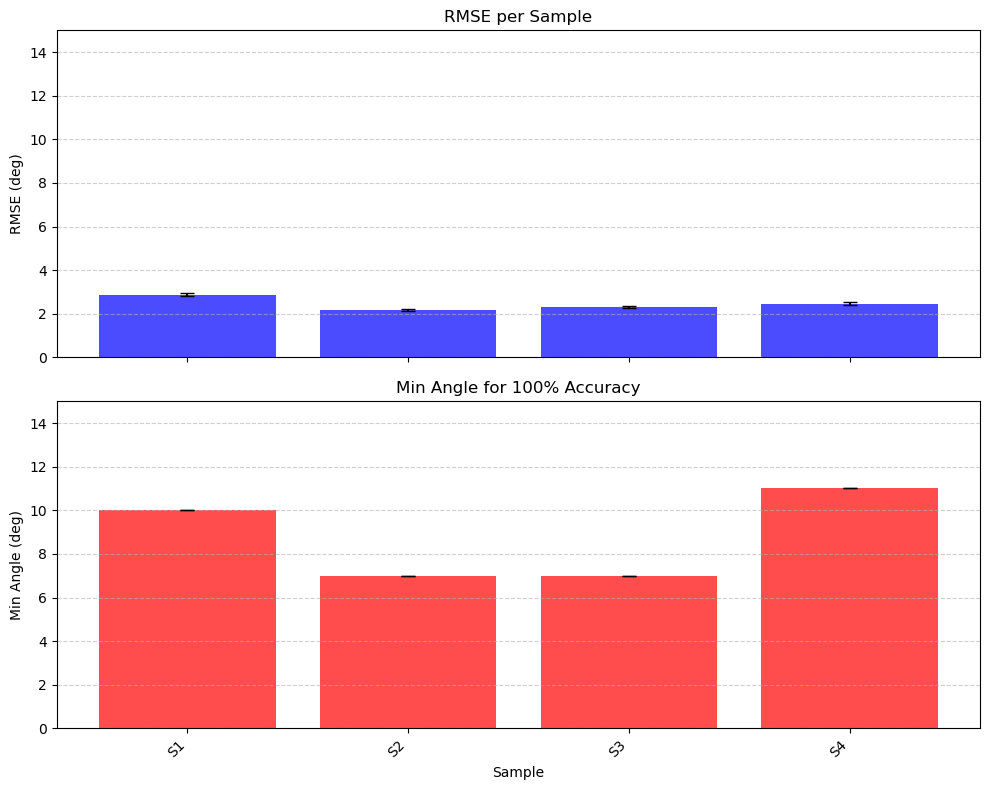

In [4]:
# first reapplication dataset

DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/first test/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/third test/*.csv")
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/fourth test/*.csv")

DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles]

rmse_mean_list = []
rmse_std_list = []
ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    mean_rmse, std_rmse, rmse_list = g.rmse_stats(n_runs=10)
    rmse_mean_list.append(mean_rmse)
    rmse_std_list.append(std_rmse)
    min_angle_100, min_acc = g.get_min_accuracy_100()
    ma_100_list.append(min_angle_100)
    

bar_labels = ["S1", "S2", "S3", "S4"]

# Plot the double bar chart
g.plot_double_bar_chart(rmse_mean_list,ma_100_list, bar_labels,
                              std1=rmse_std_list, std2=None,
                              title1="RMSE per Sample", title2="Min Angle for 100% Accuracy",
                              ylabel1="RMSE (deg)", ylabel2="Min Angle (deg)",
                              color1='b', color2='r', ylim1=(0, 15), ylim2=(0, 15))

## Comparing raw data to trained model and then showing accuracy vs angle plot

In [ ]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_6_2025/fourth test/*.csv")
DS_all = [DS1_datafiles]


# Load and normalize data
g.load_data(DS1_datafiles)
g.normalize_adc_over_R0()

g.plot_data(scatter=True)


# Train the model
g.train_model_test_accuracy()

# Overlay trained model
g.plot_trained_model_on_existing()



In [ ]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_6_2025/fourth test/*.csv")



rmse_list = []
ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    rmse_value = g.rmse()
    rmse_list.append(rmse_value)
    min_angle_100, min_acc = g.get_min_accuracy_100()
    ma_100_list.append(min_angle_100)
    
    
bar_labels = ["S1"]

# Plot the double bar chart
g.plot_double_bar_chart(rmse_list, ma_100_list, bar_labels, title1="RMSE Per Sample", title2="Angle Accuracy Per Sample")
